# 1. Probability Distributions in Tensorflow

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
tf.random.set_seed(123)

%inline matplotlib

2023-07-05 23:04:04.761031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version: 2.12.0
TFP version: 0.20.1


## Univariate distributions


### Normal Distribution

In [23]:
# Create a normal distribution from Tensorflow Distributions

# event_shape captures the dimensionality of the random variable itself
# batch_shape captures the dimensionality of the parameter(s) of the random variable
normal = tfd.Normal(loc=0., scale=1.)
print(f"Normal Distribution object {normal}")

# we can sample from the distribution
print(f"Sampling one datapoint: {normal.sample()}") # only one value is sampled

# or we can make multiple samples at once
print(f"Sampling many datapoints: {normal.sample(3).numpy()}")

# for the of continuous random variables, the method prob() returns the probability density function (PDF)
# here we are evaluating a standard normal distribution at 0.5
print(f"Evaluating a standard normal distribution at 0.5: {normal.prob(0.5)}")
print(f"Evaluating a standard log-normal distribution at 0.5: {normal.log_prob(0.5)}")


Normal Distribution object tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
Sampling one datapoint: -0.9603908658027649
Sampling many datapoints: [ 0.18069503 -0.4223899  -0.8314601 ]
Evaluating a standard normal distribution at 0.5: 0.3520653247833252
Evaluating a standard log-normal distribution at 0.5: -1.0439385175704956


### Bernoulli Distribution

In [38]:
bernoulli = tfd.Bernoulli( probs=0.7 )
print(bernoulli)

# we can instatiate a Bernoulli distribution with a logit value
bernoulli = tfd.Bernoulli( logits=0.847 )
print(bernoulli)

# we can sample from this distribution
print(f"Sampling one datapoint: {bernoulli.sample(3)}") 

# we can evaluate the probability of a sample
print(f"Evaluating a Bernoulli distribution at 1: {bernoulli.prob(1)}")

# and the log probability of a sample
print(f"Evaluating a Bernoulli distribution at 1: {bernoulli.log_prob(1)}")

# one of the powerful features of TFP is that it can handle batches of distributions
# the batch_shape is now 2. This object represents two independent Bernoulli distributions
batched_bernoulli = tfd.Bernoulli( probs=[0.4, 0.5] )
print(batched_bernoulli)
print(f"Batch: {batched_bernoulli.batch_shape}")

# sampling returns 3 independent samples in the form of a tensor in the rows as the number of samples and columns as the batch shape
print(f"Sampling datapoints: {batched_bernoulli.sample(3)}")

# we can also compute the probabilitu of the event value 1 fir each distribution
print(f"Evaluating a Bernoulli distribution at 1: {batched_bernoulli.prob([1, 1])}")

# likewise we can use the logprob() method
print(f"Evaluating a Bernoulli distribution at 1: {batched_bernoulli.log_prob([1, 1])}")


tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)
tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)
Sampling one datapoint: [1 1 0]
Evaluating a Bernoulli distribution at 1: 0.6999374628067017
Evaluating a Bernoulli distribution at 1: -0.3567643165588379
tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32)
Batch: (2,)
Sampling datapoints: [[0 1]
 [1 1]
 [0 1]]
Evaluating a Bernoulli distribution at 1: [0.4 0.5]
Evaluating a Bernoulli distribution at 1: [-0.9162907 -0.6931472]


## Exercises

In [39]:
# Create a normal distribution from Tensorflow Distributions
normal = tfd.Normal(loc=0., scale=1.)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [41]:
# Sample from the chosen distribution...
normal.sample().numpy()

-1.115051

In [43]:
# ... or sample multiple times
normal.sample(10).numpy()

array([-1.6347471 , -0.44076473, -0.24093814,  1.2124114 , -2.0128145 ,
        1.0723623 , -0.4456898 ,  1.5042174 ,  0.69465125, -0.3720731 ],
      dtype=float32)

In [56]:
# Obtain value of probability's density
normal.prob(0).numpy()

0.3989423

In [58]:
# Obtain value of logprobability
normal.log_prob(0).numpy()

-0.9189385

In [59]:
# Verify that this really is the log of the probability
np.log(0.3989423 )

-0.9189384840783509

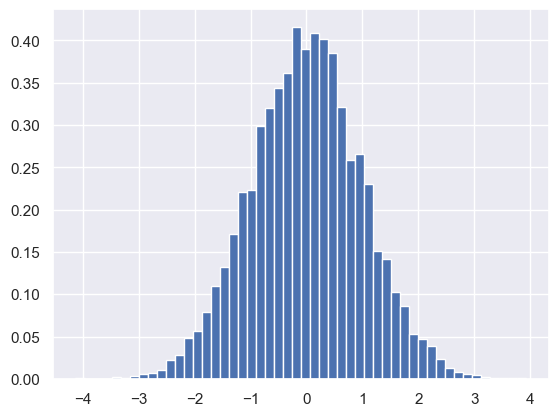

In [62]:
# Plot a histogram, approximating the density
plt.hist(normal.sample(10000).numpy(), bins=50, density=True)
plt.show()

In [52]:
# Do the same for the exponential distribution
exponential = tfd.Exponential(rate=1.)
exponential

<tfp.distributions.Exponential 'Exponential' batch_shape=[] event_shape=[] dtype=float32>

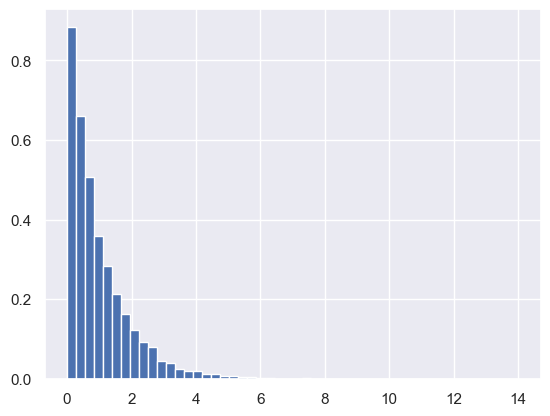

In [63]:
# Plot a histogram, approximating the density
plt.hist(exponential.sample(10000).numpy(), bins=50, density=True)
plt.show()

In [53]:
# Sample as before
exponential.sample().numpy()

1.78327

In [66]:
# Create a Bernoulli distribution (discrete)
bernoulli = tfd.Bernoulli(probs=0.8)
bernoulli.sample(10).numpy()

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int32)

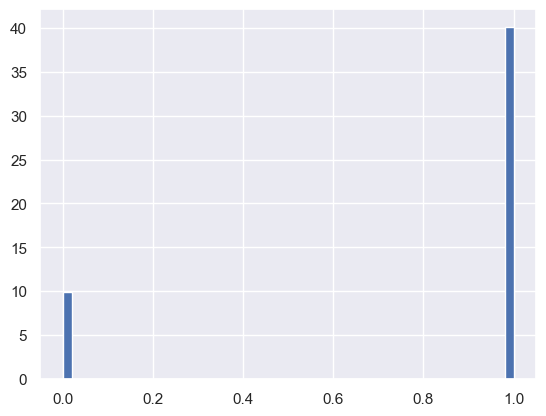

In [67]:
# Plot a histogram, approximating the density
plt.hist(bernoulli.sample(10000).numpy(), bins=50, density=True)
plt.show()

#### A word of caution on discrete distributions

In [71]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in {0, 0.5, 1, -1}:
    print('prob result {} for k = {} '.format(bernoulli.prob(k), k))

prob result 0.19999998807907104 for k = 0 
prob result 0.3999999761581421 for k = 0.5 
prob result 0.800000011920929 for k = 1 
prob result 0.04999999701976776 for k = -1 


In [72]:
def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power(1-p_success,1-k)

In [75]:
# Evaluate as before

for k in {0, 0.5, 1, -1}:
    print('prob result {} for k = {} '.format(my_bernoulli(0.8,k), k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


In [76]:
# create a batched Bernoulli distribution
batched_bernoulli = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
batched_bernoulli


<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [77]:
# sample from it
batched_bernoulli.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0]], dtype=int32)>

In [79]:
# use a batch shape with a higher rank
probs = [[ [0.5, 0.5],
           [0.8, 0.3],
           [0.25, 0.75] ]]

bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [80]:
# sample
bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 1],
         [1, 1],
         [1, 1]]],


       [[[0, 0],
         [1, 0],
         [0, 1]]]], dtype=int32)>

In [83]:
# evaluate this batch
bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>